<a href="https://colab.research.google.com/github/RaoEhsanElahi/NLP-Roman-Urdu/blob/main/training_English_model_on_Urdu_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Learning Semester Project.
##Training a pre-trained English language model on (Roman) Urdu dataset:

In [ ]:
!pip install transformers datasets soundfile speechbrain accelerate

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from datasets import load_dataset

cv_13 = load_dataset("mozilla-foundation/common_voice_13_0", "ur", split="train")

#dataset = cv_13

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]


Reading metadata...: 4129it [00:00, 80153.11it/s]


Generating validation split: 0 examples [00:00, ? examples/s]


Reading metadata...: 3302it [00:00, 69925.89it/s]


Generating test split: 0 examples [00:00, ? examples/s]


Reading metadata...: 3304it [00:00, 75579.64it/s]


Generating other split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 9068it [00:00, 90672.52it/s]
Reading metadata...: 20900it [00:00, 106929.40it/s]
Reading metadata...: 31593it [00:00, 106218.24it/s]
Reading metadata...: 43400it [00:00, 110864.79it/s]
Reading metadata...: 54616it [00:00, 111328.06it/s]
Reading metadata...: 65935it [00:00, 111956.04it/s]
Reading metadata...: 85366it [00:00, 109132.06it/s]


Generating invalidated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 3312it [00:00, 75180.00it/s]


Dataset common_voice_13_0 downloaded and prepared to /root/.cache/huggingface/datasets/mozilla-foundation___common_voice_13_0/ur/13.0.0/2506e9a8950f5807ceae08c2920e814222909fd7f477b74f5d225802e9f04055. Subsequent calls will reuse this data.


In [ ]:
len(cv_13)

4129

In [ ]:
from torch.utils.data.sampler import BatchSampler, RandomSampler
from torch.utils.data import DataLoader

batch_sampler = BatchSampler(RandomSampler(cv_13), batch_size=32, drop_last=False)
dataloader = DataLoader(cv_13, batch_sampler=batch_sampler)

In [ ]:
dataloader

In [ ]:
#!pip install torchaudio.transformers
from datasets import Audio

In [ ]:
dataset = cv_13.cast_column("audio", Audio(sampling_rate=16000))
dataset

Dataset({
    features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment', 'variant'],
    num_rows: 4129
})

In [ ]:
dataset[1]

{'client_id': 'e53f84d151d6cc6d45a57decde08a99efe47d7751a4ca60e58fb87ea68a35d53dcae445c65d5e73e0449a0b1cf2b4d09f32874877e8786664aa50f1f2ec2b932',
 'path': '/root/.cache/huggingface/datasets/downloads/extracted/05313e2880ac62e8742ba0f0ad65fbda5864279e54a4cd4e7896ce593d846ebf/ur_train_0/common_voice_ur_31771684.mp3',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/05313e2880ac62e8742ba0f0ad65fbda5864279e54a4cd4e7896ce593d846ebf/ur_train_0/common_voice_ur_31771684.mp3',
  'array': array([-6.54836185e-11, -7.27595761e-12,  7.27595761e-11, ...,
         -2.35905281e-06, -3.65845926e-06, -6.09613380e-06]),
  'sampling_rate': 16000},
 'sentence': 'اور پھر ممکن ہے کہ پاکستان بھی ہو',
 'up_votes': 2,
 'down_votes': 1,
 'age': 'twenties',
 'gender': 'male',
 'accent': '',
 'locale': 'ur',
 'segment': '',
 'variant': ''}

In [ ]:
ds = dataset
ds[1]

{'client_id': 'e53f84d151d6cc6d45a57decde08a99efe47d7751a4ca60e58fb87ea68a35d53dcae445c65d5e73e0449a0b1cf2b4d09f32874877e8786664aa50f1f2ec2b932',
 'path': '/root/.cache/huggingface/datasets/downloads/extracted/05313e2880ac62e8742ba0f0ad65fbda5864279e54a4cd4e7896ce593d846ebf/ur_train_0/common_voice_ur_31771684.mp3',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/05313e2880ac62e8742ba0f0ad65fbda5864279e54a4cd4e7896ce593d846ebf/ur_train_0/common_voice_ur_31771684.mp3',
  'array': array([-6.54836185e-11, -7.27595761e-12,  7.27595761e-11, ...,
         -2.35905281e-06, -3.65845926e-06, -6.09613380e-06]),
  'sampling_rate': 16000},
 'sentence': 'اور پھر ممکن ہے کہ پاکستان بھی ہو',
 'up_votes': 2,
 'down_votes': 1,
 'age': 'twenties',
 'gender': 'male',
 'accent': '',
 'locale': 'ur',
 'segment': '',
 'variant': ''}

In [ ]:
from transformers import SpeechT5Processor

checkpoint = "microsoft/speecht5_tts"
processor = SpeechT5Processor.from_pretrained(checkpoint)

In [ ]:
tokenizer = processor.tokenizer

In [ ]:
buck2uni = {
            u"\u0627":"A",
            u"\u0627":"A",
            u"\u0675":"A",
            u"\u0673":"A",
            u"\u0630":"A",
            u"\u0622":"AA",
            u"\u0628":"B",
            u"\u067E":"P",
            u"\u062A":"T",
            u"\u0637":"T",
            u"\u0679":"T",
            u"\u062C":"J",
            u"\u0633":"S",
            u"\u062B":"S",
            u"\u0635":"S",
            u"\u0686":"CH",
            u"\u062D":"H",
            u"\u0647":"H",
            u"\u0629":"H",
            u"\u06DF":"H",
            u"\u062E":"KH",
            u"\u062F":"D",
            u"\u0688":"D",
            u"\u0630":"Z",
            u"\u0632":"Z",
            u"\u0636":"Z",
            u"\u0638":"Z",
            u"\u068E":"Z",
            u"\u0631":"R",
            u"\u0691":"R",
            u"\u0634":"SH",
            u"\u063A":"GH",
            u"\u0641":"F",
            u"\u06A9":"K",
            u"\u0642":"K",
            u"\u06AF":"G",
            u"\u0644":"L",
            u"\u0645":"M",
            u"\u0646":"N",
            u"\u06BA":"N",
            u"\u0648":"O",
            u"\u0649":"Y",
            u"\u0626":"Y",
            u"\u06CC":"Y",
            u"\u06D2":"E",
            u"\u06C1":"H",
            u"\u064A":"E"  ,
            u"\u06C2":"AH"  ,
            u"\u06BE":"H"  ,
            u"\u0639":"A"  ,
            u"\u0643":"K" ,
            u"\u0621":"A",
            u"\u0624":"O",
            u"\u060C":"" #seperator ulta comma
}
def transString(string, reverse=0):
    '''Given a Unicode string, transliterate into Buckwalter. To go from
    Buckwalter back to Unicode, set reverse=1'''
    for k, v in buck2uni.items():
      if not reverse:
            string = string.replace(k, v)
      else:
            string = string.replace(v, k)
    return string
print(ds[0]["sentence"])
print(transString(ds[0]["sentence"]))

کبھی کبھار ہی خیالی پلاو بناتا ہوں
KBHY KBHAR HY KHYALY PLAO BNATA HON


In [ ]:
ds
def prepare_dataset(batch):
  """Function to preprocess the dataset with the .map method"""
  transcription = transString(batch["sentence"])

  if transcription.startswith('"') and transcription.endswith('"'):
    # we can remove trailing quotation marks as they do not affect the transcription
    transcription = transcription[1:-1]

  if transcription[-1] not in [".", "?", "!"]:
    # append a full-stop to sentences that do not end in punctuation
    transcription = transcription + "."

  batch["sentence"] = transcription

  return batch

ds = ds.map(prepare_dataset, desc="preprocess dataset")


preprocess dataset:   0%|          | 0/4129 [00:00<?, ? examples/s]

In [ ]:
ds['sentence'][1]

'AOR PHR MMKN HE KH PAKSTAN BHY HO.'

In [ ]:
dataset_vocab = set(ds["sentence"][0])
tokenizer_vocab = {k for k, _ in tokenizer.get_vocab().items()}

In [ ]:
dataset_vocab - tokenizer_vocab

{' '}

In [ ]:
dataset[0]

{'client_id': 'e53f84d151d6cc6d45a57decde08a99efe47d7751a4ca60e58fb87ea68a35d53dcae445c65d5e73e0449a0b1cf2b4d09f32874877e8786664aa50f1f2ec2b932',
 'path': '/root/.cache/huggingface/datasets/downloads/extracted/05313e2880ac62e8742ba0f0ad65fbda5864279e54a4cd4e7896ce593d846ebf/ur_train_0/common_voice_ur_31771683.mp3',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/05313e2880ac62e8742ba0f0ad65fbda5864279e54a4cd4e7896ce593d846ebf/ur_train_0/common_voice_ur_31771683.mp3',
  'array': array([ 5.45696821e-12, -6.59383659e-12,  5.57065505e-12, ...,
          3.56186501e-06,  1.19775723e-06,  1.19776087e-06]),
  'sampling_rate': 16000},
 'sentence': 'کبھی کبھار ہی خیالی پلاو بناتا ہوں',
 'up_votes': 2,
 'down_votes': 0,
 'age': 'twenties',
 'gender': 'male',
 'accent': '',
 'locale': 'ur',
 'segment': '',
 'variant': ''}

In [ ]:
ds[0]

{'client_id': 'e53f84d151d6cc6d45a57decde08a99efe47d7751a4ca60e58fb87ea68a35d53dcae445c65d5e73e0449a0b1cf2b4d09f32874877e8786664aa50f1f2ec2b932',
 'path': '/root/.cache/huggingface/datasets/downloads/extracted/05313e2880ac62e8742ba0f0ad65fbda5864279e54a4cd4e7896ce593d846ebf/ur_train_0/common_voice_ur_31771683.mp3',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/05313e2880ac62e8742ba0f0ad65fbda5864279e54a4cd4e7896ce593d846ebf/ur_train_0/common_voice_ur_31771683.mp3',
  'array': array([ 5.45696821e-12, -6.59383659e-12,  5.57065505e-12, ...,
          3.56186501e-06,  1.19775723e-06,  1.19776087e-06]),
  'sampling_rate': 16000},
 'sentence': 'KBHY KBHAR HY KHYALY PLAO BNATA HON.',
 'up_votes': 2,
 'down_votes': 0,
 'age': 'twenties',
 'gender': 'male',
 'accent': '',
 'locale': 'ur',
 'segment': '',
 'variant': ''}

In [ ]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier

spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cuda" if torch.cuda.is_available() else "cpu"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name),
)


def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings

In [ ]:
def prepare_dataset(example):
    audio = example["audio"]

    example = processor(
        text=example["sentence"],
        audio_target=audio["array"],
        sampling_rate=audio["sampling_rate"],
        return_attention_mask=False,
    )

    # strip off the batch dimension
    example["labels"] = example["labels"][0]

    # use SpeechBrain to obtain x-vector
    example["speaker_embeddings"] = create_speaker_embedding(audio["array"])

    return example

In [ ]:
processed_example = prepare_dataset(dataset[0])
list(processed_example.keys())

/usr/local/lib/python3.10/dist-packages/torch/functional.py:641: UserWarning: stft with return_complex=False is deprecated. In a future pytorch release, stft will return complex tensors for all inputs, and return_complex=False will raise an error.
Note: you can still call torch.view_as_real on the complex output to recover the old return format. (Triggered internally at ../aten/src/ATen/native/SpectralOps.cpp:862.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore[attr-defined]


['input_ids', 'labels', 'speaker_embeddings']

In [ ]:
processed_example["speaker_embeddings"].shape

(512,)

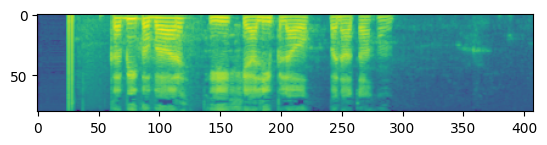

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()

In [ ]:
dataset = dataset.map(prepare_dataset, remove_columns=dataset.column_names)

Map:   0%|          | 0/4129 [00:00<?, ? examples/s]

In [ ]:
def is_not_too_long(input_ids):
    input_length = len(input_ids)
    return input_length < 200


dataset = dataset.filter(is_not_too_long, input_columns=["input_ids"])
len(dataset)

Filter:   0%|          | 0/4129 [00:00<?, ? examples/s]

4129

In [ ]:
dataset = dataset.train_test_split(test_size=0.1)

In [ ]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union


@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(
        self, features: List[Dict[str, Union[List[int], torch.Tensor]]]
    ) -> Dict[str, torch.Tensor]:
        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids, labels=label_features, return_tensors="pt"
        )

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor(
                [len(feature["input_values"]) for feature in label_features]
            )
            target_lengths = target_lengths.new(
                [
                    length - length % model.config.reduction_factor
                    for length in target_lengths
                ]
            )
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In [ ]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

In [ ]:
from transformers import SpeechT5ForTextToSpeech

model = SpeechT5ForTextToSpeech.from_pretrained(checkpoint)

In [ ]:
from functools import partial

# disable cache during training since it's incompatible with gradient checkpointing
model.config.use_cache = False

# set language and task for generation and re-enable cache
model.generate = partial(model.generate, use_cache=True)

In [ ]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="speecht5_finetuned_roman_ur",
    per_device_train_batch_size=4,
    gradient_accumulation_steps=8,
    learning_rate=1e-5,
    warmup_steps=500,
    max_steps=4000,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=2,
    save_steps=1000,
    eval_steps=1000,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True,
)

In [ ]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=data_collator,
    tokenizer=processor,
)

Cloning https://huggingface.co/EhsanElahi/speecht5_finetuned_voxpopuli_nl into local empty directory.


Download file pytorch_model.bin:   0%|          | 16.5k/558M [00:00<?, ?B/s]

Download file runs/Jul14_12-16-22_2912838571da/events.out.tfevents.1689336988.2912838571da.292.0: 100%|#######…

Clean file runs/Jul14_12-16-22_2912838571da/events.out.tfevents.1689336988.2912838571da.292.0:   5%|5         …

Download file training_args.bin: 100%|##########| 4.06k/4.06k [00:00<?, ?B/s]

Clean file training_args.bin:  25%|##4       | 1.00k/4.06k [00:00<?, ?B/s]

Download file spm_char.model:   7%|7         | 17.0k/233k [00:00<?, ?B/s]

Clean file spm_char.model:   0%|          | 1.00k/233k [00:00<?, ?B/s]

Clean file pytorch_model.bin:   0%|          | 1.00k/558M [00:00<?, ?B/s]

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss
1000,0.577100,0.521918
2000,0.541100,0.506362
3000,0.535200,0.501165
4000,0.532400,0.501525


TrainOutput(global_step=4000, training_loss=0.5758861231803895, metrics={'train_runtime': 7339.5094, 'train_samples_per_second': 17.44, 'train_steps_per_second': 0.545, 'total_flos': 2879765934575904.0, 'train_loss': 0.5758861231803895, 'epoch': 34.45})

#Evaluation

In [ ]:
trainer.push_to_hub()

Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file pytorch_model.bin:   0%|          | 1.00/558M [00:00<?, ?B/s]

Upload file runs/Jul17_05-42-46_1469eac61673/events.out.tfevents.1689572692.1469eac61673.514.0:   0%|         …

To https://huggingface.co/EhsanElahi/speecht5_finetuned_voxpopuli_nl
   4710ed3..eb24319  main -> main

   4710ed3..eb24319  main -> main

To https://huggingface.co/EhsanElahi/speecht5_finetuned_voxpopuli_nl
   eb24319..e28acff  main -> main

   eb24319..e28acff  main -> main



'https://huggingface.co/EhsanElahi/speecht5_finetuned_voxpopuli_nl/commit/eb2431990b7229443e46cd4343264fdab7269989'

In [ ]:
model = SpeechT5ForTextToSpeech.from_pretrained(
    "EhsanElahi/speecht5_finetuned_voxpopuli_nl"
)

In [ ]:
example = dataset["test"][256]
speaker_embeddings = torch.tensor(example["speaker_embeddings"]).unsqueeze(0)

In [ ]:
text = "mera kaam pura ho gaya hai"

In [ ]:
inputs = processor(text=text, return_tensors="pt")

In [ ]:
from transformers import SpeechT5HifiGan

vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")
speech = model.generate_speech(inputs["input_ids"], speaker_embeddings, vocoder=vocoder)

In [ ]:
from IPython.display import Audio

Audio(speech.numpy(), rate=16000)